<a href="https://colab.research.google.com/github/ErickMartinezz/AprendizajeAutomatico/blob/main/Aprendizaje_no_supervisado_ErickMartinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA1 Aprendizaje no supervisado

**Erick Martinez**

Dataset elegido : https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de clustering y reducción de dimensionalidad**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

DATASET: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)


/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [5]:
# Renombrar columnas a español
X.rename(columns={
    'Global_active_power': 'Potencia_activa_global',
    'Global_reactive_power': 'Potencia_reactiva_global',
    'Voltage': 'Voltaje',
    'Global_intensity': 'Intensidad_global',
    'Sub_metering_1': 'Submedicion_1',
    'Sub_metering_2': 'Submedicion_2',
    'Sub_metering_3': 'Submedicion_3'
}, inplace=True)

# Mostrar las primeras filas para verificar el cambio
print(X.head())

         Date      Time Potencia_activa_global Potencia_reactiva_global  \
0  16/12/2006  17:24:00                  4.216                    0.418   
1  16/12/2006  17:25:00                  5.360                    0.436   
2  16/12/2006  17:26:00                  5.374                    0.498   
3  16/12/2006  17:27:00                  5.388                    0.502   
4  16/12/2006  17:28:00                  3.666                    0.528   

   Voltaje Intensidad_global Submedicion_1 Submedicion_2  Submedicion_3  
0  234.840            18.400         0.000         1.000           17.0  
1  233.630            23.000         0.000         1.000           16.0  
2  233.290            23.000         0.000         2.000           17.0  
3  233.740            23.000         0.000         1.000           17.0  
4  235.680            15.800         0.000         1.000           17.0  


In [6]:
import pandas as pd
df = pd.concat([X, y], axis=1)
print(df.head())

         Date      Time Potencia_activa_global Potencia_reactiva_global  \
0  16/12/2006  17:24:00                  4.216                    0.418   
1  16/12/2006  17:25:00                  5.360                    0.436   
2  16/12/2006  17:26:00                  5.374                    0.498   
3  16/12/2006  17:27:00                  5.388                    0.502   
4  16/12/2006  17:28:00                  3.666                    0.528   

   Voltaje Intensidad_global Submedicion_1 Submedicion_2  Submedicion_3  
0  234.840            18.400         0.000         1.000           17.0  
1  233.630            23.000         0.000         1.000           16.0  
2  233.290            23.000         0.000         2.000           17.0  
3  233.740            23.000         0.000         1.000           17.0  
4  235.680            15.800         0.000         1.000           17.0  


In [7]:
cols_numericas = [
    'Potencia_activa_global', # Use the renamed column names
    'Potencia_reactiva_global',
    'Voltaje',
    'Intensidad_global',
    'Submedicion_1',
    'Submedicion_2',
    'Submedicion_3'
]

# Convertir a tipo numérico (float) now that 'df' contains these columns
for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify the data types after conversion
print(df.dtypes)

Date                         object
Time                         object
Potencia_activa_global      float64
Potencia_reactiva_global    float64
Voltaje                     float64
Intensidad_global           float64
Submedicion_1               float64
Submedicion_2               float64
Submedicion_3               float64
dtype: object


In [8]:
df

,Date,Time,Potencia_activa_global,Potencia_reactiva_global,Voltaje,Intensidad_global,Submedicion_1,Submedicion_2,Submedicion_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [9]:
print(df.dtypes)

Date                         object
Time                         object
Potencia_activa_global      float64
Potencia_reactiva_global    float64
Voltaje                     float64
Intensidad_global           float64
Submedicion_1               float64
Submedicion_2               float64
Submedicion_3               float64
dtype: object



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

In [10]:
df.describe()

,Potencia_activa_global,Potencia_reactiva_global,Voltaje,Intensidad_global,Submedicion_1,Submedicion_2,Submedicion_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


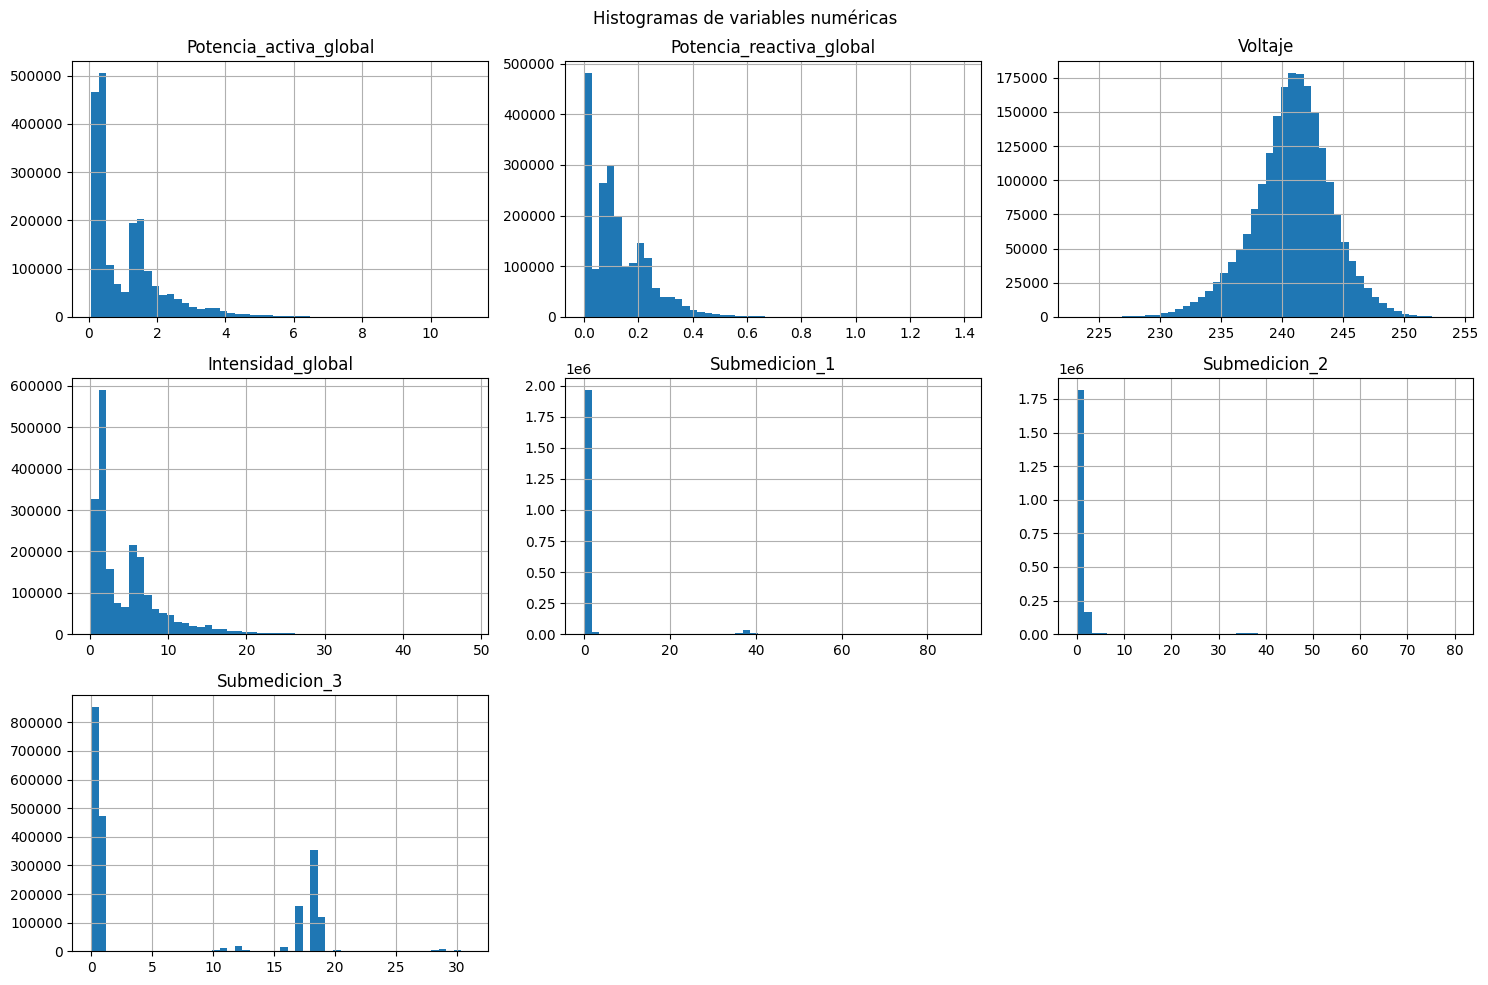

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de columnas numéricas
variables = [
    'Potencia_activa_global',
    'Potencia_reactiva_global',
    'Voltaje',
    'Intensidad_global',
    'Submedicion_1',
    'Submedicion_2',
    'Submedicion_3'
]

# Histogramas
df[variables].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histogramas de variables numéricas')
plt.tight_layout()
plt.show()


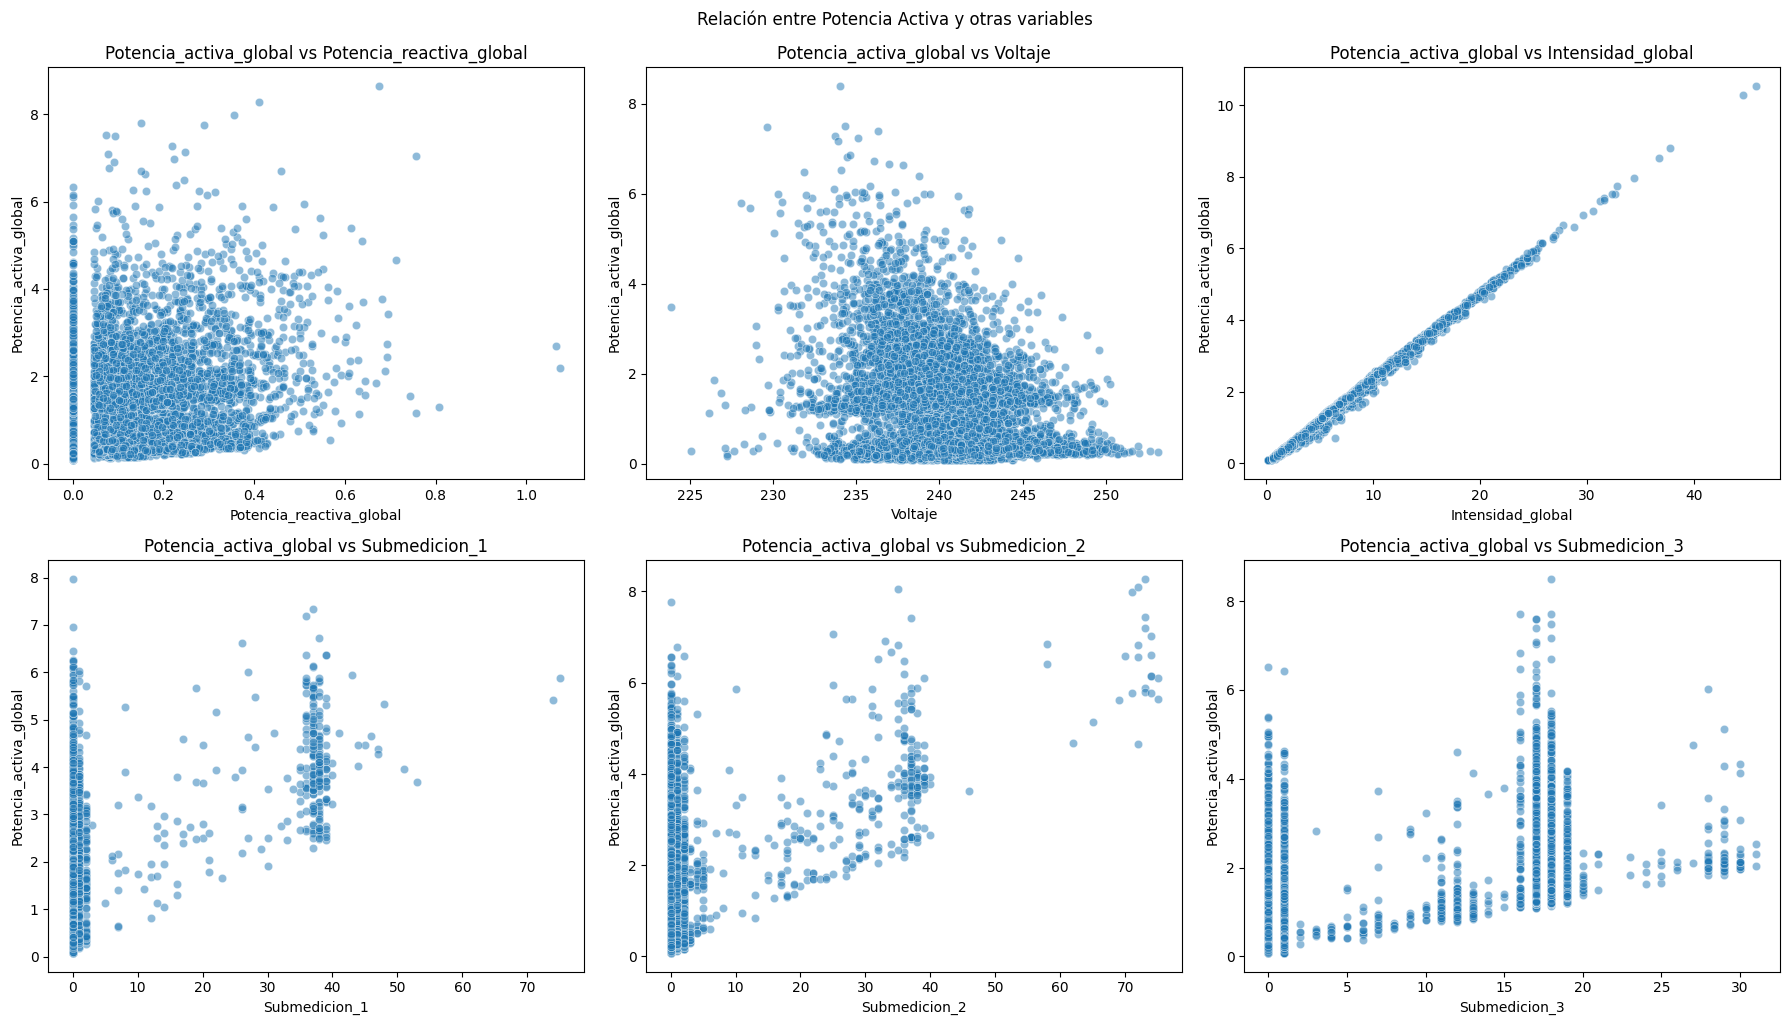

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

targets = ['Potencia_reactiva_global', 'Voltaje', 'Intensidad_global', 'Submedicion_1', 'Submedicion_2', 'Submedicion_3']
for i, var in enumerate(targets):
    ax = axes[i//3, i%3]
    sns.scatterplot(data=df.sample(10000), x=var, y='Potencia_activa_global', alpha=0.5, ax=ax)
    ax.set_title(f'Potencia_activa_global vs {var}')

plt.tight_layout()
plt.suptitle('Relación entre Potencia Activa y otras variables', y=1.02)
plt.show()


Sí, se observan relaciones claras entre algunas variables del dataset.


✅ 1. Intensidad_global
Existe una relación fuertemente lineal positiva.

A mayor intensidad, mayor potencia activa.
Esta es la relación más clara observada.

✅ 2. Submedicion_2
Se observa una tendencia creciente: cuando sube Submedicion_2, también lo hace la potencia activa.

Esto sugiere que ciertos aparatos o circuitos asociados a esta submedición tienen un peso importante en el consumo.


## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - El objetivo de este paso es quedar con variables todas numéricas y en la misma escala.

## Resolución:

👉 Reviso si hay valores nulos:

In [13]:
df.isnull().sum()

,0
Date,0
Time,0
Potencia_activa_global,25979
Potencia_reactiva_global,25979
Voltaje,25979
Intensidad_global,25979
Submedicion_1,25979
Submedicion_2,25979
Submedicion_3,25979


👉  Elimino los valores nulos, ya que son relativamente pocos comparados con los datos totales

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

,0
Date,0
Time,0
Potencia_activa_global,0
Potencia_reactiva_global,0
Voltaje,0
Intensidad_global,0
Submedicion_1,0
Submedicion_2,0
Submedicion_3,0


In [16]:
# Crear una columna datetime a partir de Date y Time
df['Fecha_Hora'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Establecer como índice
df.set_index('Fecha_Hora', inplace=True)


In [17]:
# Eliminar columnas Date y Time si ya no las necesitas
df.drop(columns=['Date', 'Time'], inplace=True)

In [18]:
df.head()

,Potencia_activa_global,Potencia_reactiva_global,Voltaje,Intensidad_global,Submedicion_1,Submedicion_2,Submedicion_3
Fecha_Hora,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


👉 Elimine las columnas Data y Time y las junte en una sola columna fecha y hora, la cual puede servir para proximos analisis.




## 4. **Clustering**  
   

En este apartado aplicará clustering sobre los datos obtenidos del paso 3)

### 4.1 -  K-means
   - Determine el número ideal de clústers usando Silhoutte Score.
   - Aplique K-means sobre los datos procesados del grupo anterior.
   

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import resample



In [20]:
features = [
    'Potencia_activa_global',
    'Potencia_reactiva_global',
    'Voltaje',
    'Intensidad_global',
    'Submedicion_1',
    'Submedicion_2',
    'Submedicion_3'
]
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_sample = resample(X_scaled, n_samples=10000, random_state=42)


In [22]:
# Calcular Silhouette Score en la muestra
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

K=2, Silhouette Score=0.5553
K=3, Silhouette Score=0.4206
K=4, Silhouette Score=0.4407
K=5, Silhouette Score=0.3457
K=6, Silhouette Score=0.3340
K=7, Silhouette Score=0.3083
K=8, Silhouette Score=0.3084
K=9, Silhouette Score=0.2970
K=10, Silhouette Score=0.2940


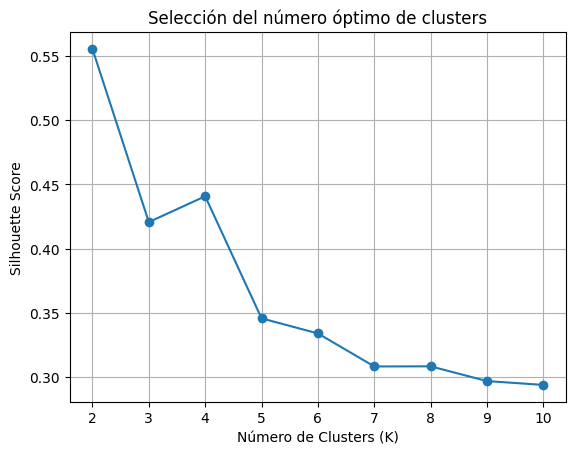

In [23]:
# Gráfico de Silhouette Score
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Selección del número óptimo de clusters')
plt.grid(True)
plt.show()


In [24]:
# Mejor número de clusters
k_opt = K_range[np.argmax(silhouette_scores)]
print(f"\nNúmero óptimo de clusters: {k_opt}")



Número óptimo de clusters: 2


In [25]:
# Aplicar K-means con el mejor K al dataset completo
kmeans_final = KMeans(n_clusters=k_opt, random_state=42)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

### 4.2 Análisis intra-clúster

Para el modelo de K-means con el valor de k (número de clústeres) ideal, analice los datos que pertenecen a cada clústers. ¿Cuáles son sus características / distribución? Puede usar gráficas como box-plots

In [26]:
cluster_stats = df.groupby('Cluster')[features].mean().round(2)
print(cluster_stats)

         Potencia_activa_global  Potencia_reactiva_global  Voltaje  \
Cluster                                                              
0                          2.12                      0.14   239.37   
1                          0.45                      0.11   241.75   

         Intensidad_global  Submedicion_1  Submedicion_2  Submedicion_3  
Cluster                                                                  
0                     8.89           2.87           2.76          15.94  
1                     1.98           0.04           0.39           0.56  


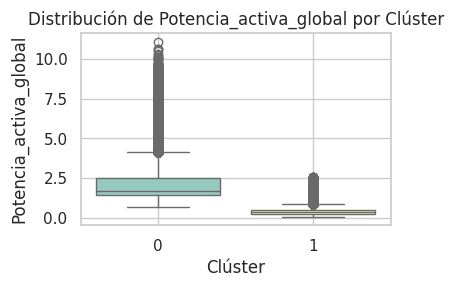

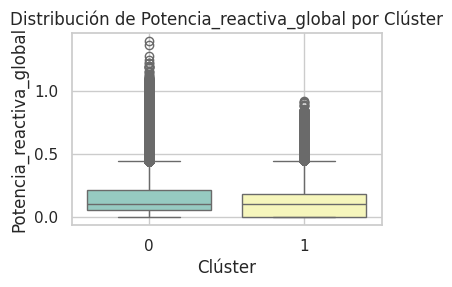

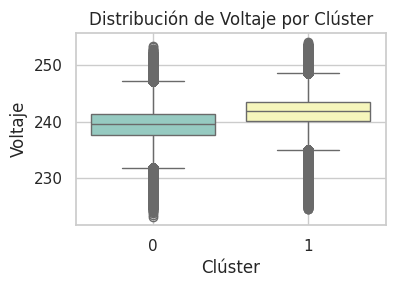

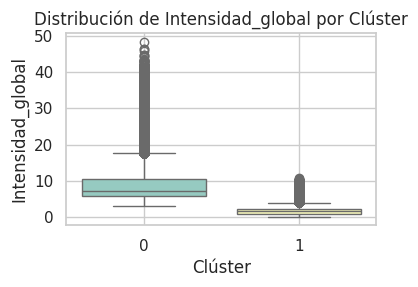

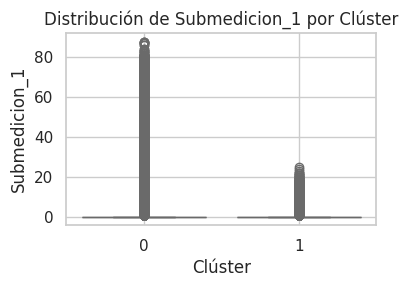

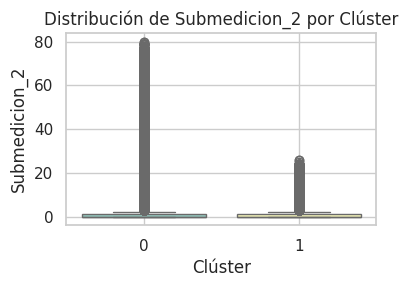

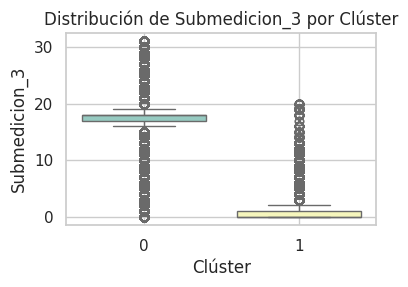

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for feature in features:
    plt.figure(figsize=(4, 2.5))
    sns.boxplot(x='Cluster', y=feature, hue='Cluster', data=df, palette='Set3', legend=False)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.xlabel('Clúster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()

# Clúster 0 "Consumo Alto”

Potencia activa global: 2.12
Intensidad global: 8.89
submediciones: Submedición 3 especialmente alta 15.94

Conclusión: Este grupo representa probablemente hogares con mayor actividad eléctrica o que tienen equipos de alto consumo.

# Clúster 1 "Consumo Bajo"

Potencia activa global: 0.45
Intensidad global: 1.98
Submediciones: cercanas a cero, especialmente Submedición 1 0.04

Conclusión: Este clúster agrupa probablemente horas de inactividad.


## 5- Reducción de dimensionalidad

### 5.1 Aplicar PCA o t-SNE para reducir la dimensionalidad a 2D/3D y visualizar los datos

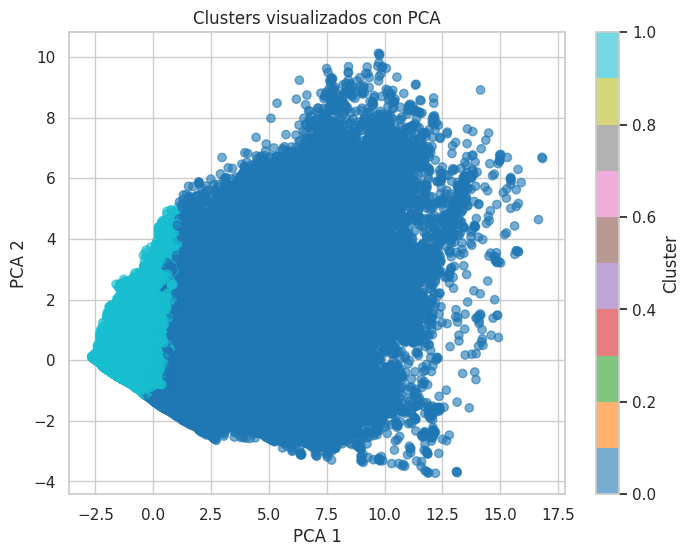

In [28]:
# Visualización con PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters visualizados con PCA')
plt.colorbar(label='Cluster')
plt.show()

### 5.2 Clustering sobre datos reducidos

Aplicar clustering K-means sobre el dataset obtenido en 5.1. Realice los mismos pasos y análisis que realizó para el punto 4) pero con este dataset reducido.

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled es tu dataset original escalado

K=2, Silhouette Score=0.5553
K=3, Silhouette Score=0.4206
K=4, Silhouette Score=0.4407
K=5, Silhouette Score=0.3457
K=6, Silhouette Score=0.3340
K=7, Silhouette Score=0.3083
K=8, Silhouette Score=0.3084
K=9, Silhouette Score=0.2970
K=10, Silhouette Score=0.2940


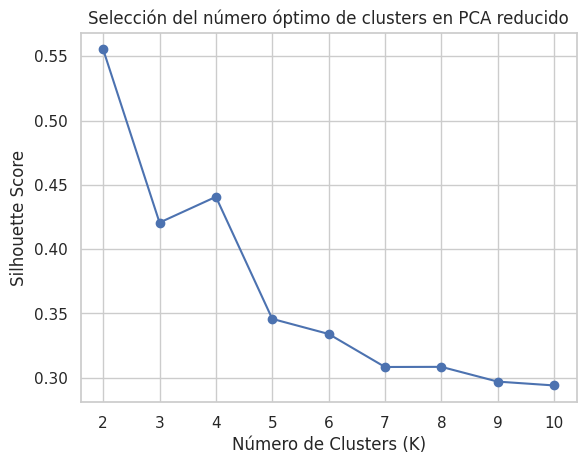

Mejor número de clusters (PCA reducido): 2


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X_pca = resample(X_scaled, n_samples=10000, random_state=42)
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Selección del número óptimo de clusters en PCA reducido')
plt.grid(True)
plt.show()

k_opt = K_range[np.argmax(silhouette_scores)]
print(f"Mejor número de clusters (PCA reducido): {k_opt}")


In [31]:
kmeans_pca = KMeans(n_clusters=2, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)


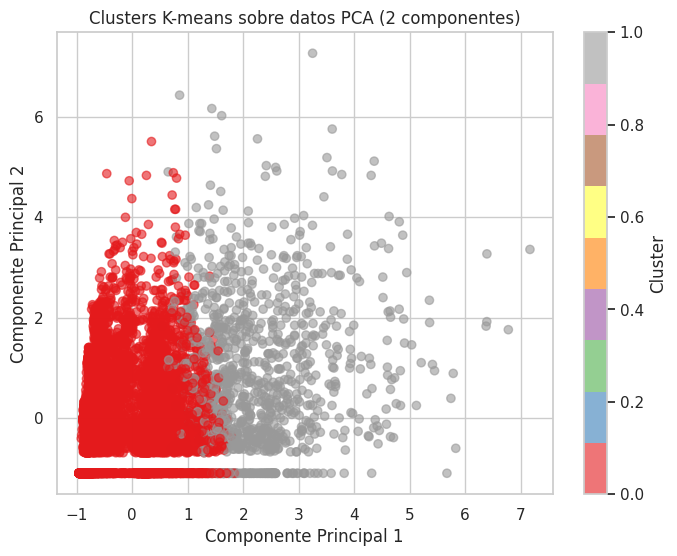

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='Set1', alpha=0.6)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters K-means sobre datos PCA (2 componentes)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## 6- Conclusiones

Escriba sus conclusiones comparando los resultados y experiencia entre aplicar clustering a todo el dataset vs al dataset reducido.

Discutir:

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?
* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

Fundamente, justifique con sus palabras.

* ¿ Los clústeres se corresponden con clases reales ( si las hay)?

En este dataset no existen etiquetas de clases reales (no supervisado), pero los clusters parecen corresponderse con patrones reales de consumo:

Cluster 0: usuarios en horarios o contextos de alto consumo eléctrico.

Cluster 1: usuarios o momentos con bajo o nulo consumo (como noches o momentos sin actividad).

Por lo tanto, aunque no hay clases "oficiales", los grupos tienen interpretación lógica y se relacionan con comportamientos reales.

* ¿ La reducción de dimensionalidad mejoró o empeoró el desempeño del clustering?

En este caso, el rendimiento del clustering no se vio afectado, ya que el número óptimo de clústeres fue consistente (k=2).



# 7- Bonus: elija una de las siguientes consignas para resolver.



## 7.1 Aplicar DBSCAN sobre su dataset.

Aplique clustering con DBSCAN sobre su dataset en ambas versiones: el dataset completo y reducido (PCA o t-SNE). Evalue los resultados.

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])


In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan_pca = DBSCAN(eps=0.3, min_samples=10)
labels_pca = dbscan_pca.fit_predict(X_pca)

n_clusters_pca = len(set(labels_pca)) - (1 if -1 in labels_pca else 0)
print(f"Número de clusters encontrados (PCA): {n_clusters_pca}")

if n_clusters_pca > 1:
    score_pca = silhouette_score(X_pca, labels_pca)
    print(f"Silhouette Score (PCA): {score_pca:.4f}")


Número de clusters encontrados (PCA): 11
Silhouette Score (PCA): -0.0101


In [40]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

X_sample = resample(X_scaled, n_samples=10000, random_state=42)
dbscan_sample = DBSCAN(eps=0.5, min_samples=10)
labels_sample = dbscan_sample.fit_predict(X_sample)

# Número de clusters detectados (excluyendo ruido)
n_clusters_full = len(set(labels_sample)) - (1 if -1 in labels_sample else 0)
print(f"Número de clusters encontrados (completo): {n_clusters_full}")

# Silhouette Score (solo si hay más de 1 cluster)
if n_clusters_full > 1:
    # Changed from X_scaled to X_sample for silhouette_score calculation
    score_full = silhouette_score(X_sample, labels_sample)
    print(f"Silhouette Score (completo): {score_full:.4f}")

Número de clusters encontrados (completo): 3
Silhouette Score (completo): 0.3649


## Conclusión DBSCAN
Cuando aplicamos DBSCAN al dataset completo, se encontraron 3 grupos con buenos resultados. En cambio, al usar la versión reducida con PCA, el algoritmo detectó muchos grupos que no tenían sentido y el resultado fue peor.

Esto muestra que reducir los datos con PCA no siempre mejora los resultados. En este caso, es mejor aplicar DBSCAN directamente sobre el dataset original (aunque tarda más), ya que encuentra grupos más claros.



## 7.2 Análisis de outliers

- Usar DBSCAN para detectar los outliers en su dataset.
- Reducir la dimensionalidad y verificar si los outliers son identificables visualmente en 2D/3D.
- Escriba sus reflexiones: ¿ los outliers forman un clúster propio? ¿PCA / t-SNE preserva las anomalías?

# Referencias

Mencione los recursos utilizados


Utilice ayuda de chat gpt, principalmente para ir reduciendo el dataset.

Por ejemplo en esta linea de codigo :

X_sample = resample(X_scaled, n_samples=10000, random_state=42)
dbscan_sample = DBSCAN(eps=0.5, min_samples=10)
labels_sample = dbscan_sample.fit_predict(X_sample)

Lo escale para que pueda funcionar en mi computadora, ya que el dataset completo no funcionaba correctamente al tener tantos datos.